# Regression Analysis on Health Data

In [1]:
spark

StatementMeta(80dcc4b2-bc50-4e81-91e5-397b7f13252e, 23, 6, Finished, Available)

In [36]:
from pyspark.sql import functions as F
import pandas as pd

StatementMeta(80dcc4b2-bc50-4e81-91e5-397b7f13252e, 23, 41, Finished, Available)

# Data Preprocessing

## Read Data from Local and Show

In [68]:
# Reading the data 
df = pd.read_csv('Users/ml2078/fall-2023-reddit-project-team-10/data/csv/mbti_health.csv') 
  
# Showing the data 
df.head()

StatementMeta(80dcc4b2-bc50-4e81-91e5-397b7f13252e, 23, 73, Finished, Available)

,S No,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,1,53,62,125,Female,Low,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A
1,2,52,69,157,Male,High,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B
2,3,30,69,200,Male,High,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A
3,4,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
4,5,45,63,199,Female,Moderate,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A


In [69]:
#Create PySpark DataFrame from Pandas
health=spark.createDataFrame(df) 
health.printSchema()
health.show(5)

StatementMeta(80dcc4b2-bc50-4e81-91e5-397b7f13252e, 23, 74, Finished, Available)

root
 |-- S No: long (nullable = true)
 |-- AGE: long (nullable = true)
 |-- HEIGHT: long (nullable = true)
 |-- WEIGHT: long (nullable = true)
 |-- SEX: string (nullable = true)
 |-- ACTIVITY LEVEL: string (nullable = true)
 |-- PAIN 1: double (nullable = true)
 |-- PAIN 2: double (nullable = true)
 |-- PAIN 3: double (nullable = true)
 |-- PAIN 4: double (nullable = true)
 |-- MBTI: string (nullable = true)
 |-- E: long (nullable = true)
 |-- I: long (nullable = true)
 |-- S: long (nullable = true)
 |-- N: long (nullable = true)
 |-- T: long (nullable = true)
 |-- F: long (nullable = true)
 |-- J: long (nullable = true)
 |-- P: long (nullable = true)
 |-- POSTURE: string (nullable = true)

+----+---+------+------+------+--------------+------+------+------+------+----+---+---+---+---+---+---+---+---+-------+
|S No|AGE|HEIGHT|WEIGHT|   SEX|ACTIVITY LEVEL|PAIN 1|PAIN 2|PAIN 3|PAIN 4|MBTI|  E|  I|  S|  N|  T|  F|  J|  P|POSTURE|
+----+---+------+------+------+--------------+------+------

## Create Total Pain Variable

In [70]:
health = health.withColumn("total_pain", F.col("PAIN 1") + F.col("PAIN 2") + F.col("PAIN 3") + F.col("PAIN 4"))
health.show(5)
health.limit(5).toPandas().to_csv("Users/ml2078/fall-2023-reddit-project-team-10/data/csv/health_total_health.csv",index=False)


StatementMeta(80dcc4b2-bc50-4e81-91e5-397b7f13252e, 23, 75, Finished, Available)

+----+---+------+------+------+--------------+------+------+------+------+----+---+---+---+---+---+---+---+---+-------+----------+
|S No|AGE|HEIGHT|WEIGHT|   SEX|ACTIVITY LEVEL|PAIN 1|PAIN 2|PAIN 3|PAIN 4|MBTI|  E|  I|  S|  N|  T|  F|  J|  P|POSTURE|total_pain|
+----+---+------+------+------+--------------+------+------+------+------+----+---+---+---+---+---+---+---+---+-------+----------+
|   1| 53|    62|   125|Female|           Low|   0.0|   0.0|   0.0|   0.0|ESFJ| 18|  3| 17|  9|  9| 13| 18|  4|      A|       0.0|
|   2| 52|    69|   157|  Male|          High|   7.0|   8.0|   5.0|   3.0|ISTJ|  6| 15| 14| 12| 21|  3| 13|  9|      B|      23.0|
|   3| 30|    69|   200|  Male|          High|   0.0|   0.0|   0.0|   0.0|ESTJ| 15|  6| 16| 10| 15|  9| 12| 10|      A|       0.0|
|   4| 51|    66|   175|  Male|      Moderate|   9.5|   9.5|   9.5|   1.5|ISTJ|  6| 15| 21|  5| 13| 11| 19|  3|      D|      30.0|
|   5| 45|    63|   199|Female|      Moderate|   4.0|   5.0|   2.0|   2.0|ENFJ| 14|

## Drop Individual Pain to Avoid Multicollinearity

In [71]:
health = health.drop("PAIN 1","PAIN 2","PAIN 3","PAIN 4")
health.show(5)

StatementMeta(80dcc4b2-bc50-4e81-91e5-397b7f13252e, 23, 76, Finished, Available)

+----+---+------+------+------+--------------+----+---+---+---+---+---+---+---+---+-------+----------+
|S No|AGE|HEIGHT|WEIGHT|   SEX|ACTIVITY LEVEL|MBTI|  E|  I|  S|  N|  T|  F|  J|  P|POSTURE|total_pain|
+----+---+------+------+------+--------------+----+---+---+---+---+---+---+---+---+-------+----------+
|   1| 53|    62|   125|Female|           Low|ESFJ| 18|  3| 17|  9|  9| 13| 18|  4|      A|       0.0|
|   2| 52|    69|   157|  Male|          High|ISTJ|  6| 15| 14| 12| 21|  3| 13|  9|      B|      23.0|
|   3| 30|    69|   200|  Male|          High|ESTJ| 15|  6| 16| 10| 15|  9| 12| 10|      A|       0.0|
|   4| 51|    66|   175|  Male|      Moderate|ISTJ|  6| 15| 21|  5| 13| 11| 19|  3|      D|      30.0|
|   5| 45|    63|   199|Female|      Moderate|ENFJ| 14|  7| 20|  6|  9| 15| 16|  6|      A|      13.0|
+----+---+------+------+------+--------------+----+---+---+---+---+---+---+---+---+-------+----------+
only showing top 5 rows



# Numeric Variable Correlation Matrix

StatementMeta(80dcc4b2-bc50-4e81-91e5-397b7f13252e, 23, 111, Finished, Available)

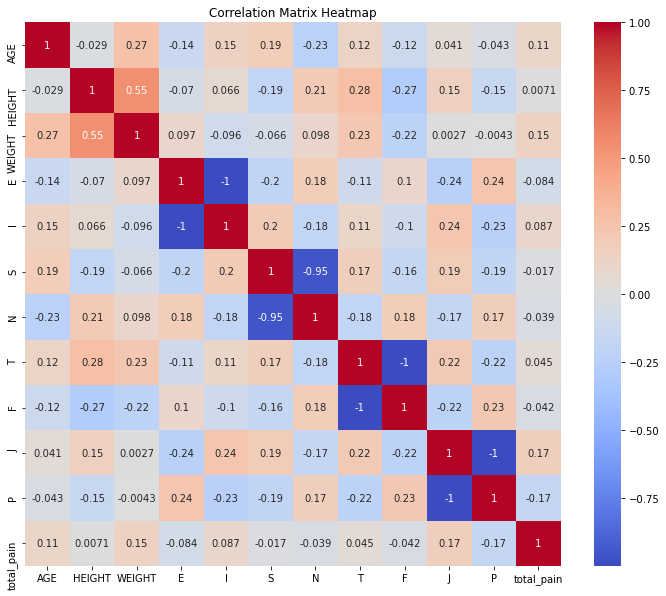

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_var = health.select('AGE','HEIGHT','WEIGHT','E','I','S','N','T','F','J','P','total_pain')
numeric_var_pd = numeric_var.toPandas()

correlation_matrix = numeric_var_pd.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.savefig('Users/ml2078/fall-2023-reddit-project-team-10/data/plots/cor_matrix.png', dpi=300, bbox_inches='tight')

plt.show()

## One-hot Encoding Categorical Variable
- Create pipeline for later use
- Use StringIndexer, OneHotEncoder, VectorAssembler
- Display mapping 

In [74]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline

# Define the columns to be one-hot encoded
categoricalColumns = ["SEX", "ACTIVITY LEVEL","POSTURE"]

# Define the stages of the pipeline
stages = []

# Create and display the mappings for each categorical column
for categoricalCol in categoricalColumns:
    # StringIndexer: convert strings to label indices
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + "Index")
    
    # Fit and transform to display the mapping
    indexed = stringIndexer.fit(health).transform(health)
    indexed.select(categoricalCol, categoricalCol + "Index").distinct().show()
    
    # OneHotEncoder: encode label indices to binary vectors
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "OHE"])
    
    stages += [stringIndexer, encoder]

# Apply the stages in a pipeline to transform the DataFrame
pipeline = Pipeline(stages=stages)
pipelineModel = pipeline.fit(health)
df_transformed = pipelineModel.transform(health)

pipeline_model_path = "Users/ml2078/fall-2023-reddit-project-team-10/pipeline"
pipelineModel.save(pipeline_model_path)

# Display the transformed DataFrame
df_transformed.show(5)


StatementMeta(80dcc4b2-bc50-4e81-91e5-397b7f13252e, 23, 79, Finished, Available)

+------+--------+
|   SEX|SEXIndex|
+------+--------+
|  Male|     1.0|
|Female|     0.0|
+------+--------+

+--------------+-------------------+
|ACTIVITY LEVEL|ACTIVITY LEVELIndex|
+--------------+-------------------+
|      Moderate|                1.0|
|           Low|                0.0|
|          High|                2.0|
+--------------+-------------------+

+-------+------------+
|POSTURE|POSTUREIndex|
+-------+------------+
|      A|         1.0|
|      B|         0.0|
|      C|         3.0|
|      D|         2.0|
+-------+------------+

+----+---+------+------+------+--------------+----+---+---+---+---+---+---+---+---+-------+----------+--------+-------------+-------------------+-----------------+------------+-------------+
|S No|AGE|HEIGHT|WEIGHT|   SEX|ACTIVITY LEVEL|MBTI|  E|  I|  S|  N|  T|  F|  J|  P|POSTURE|total_pain|SEXIndex|       SEXOHE|ACTIVITY LEVELIndex|ACTIVITY LEVELOHE|POSTUREIndex|   POSTUREOHE|
+----+---+------+------+------+--------------+----+---+---+---+-

In [75]:
# Display the transformed DataFrame
df_transformed.show(5)
df_transformed.limit(5).toPandas().to_csv("Users/ml2078/fall-2023-reddit-project-team-10/data/csv/health_total_health.csv",index=False)


StatementMeta(80dcc4b2-bc50-4e81-91e5-397b7f13252e, 23, 80, Finished, Available)

+----+---+------+------+------+--------------+----+---+---+---+---+---+---+---+---+-------+----------+--------+-------------+-------------------+-----------------+------------+-------------+
|S No|AGE|HEIGHT|WEIGHT|   SEX|ACTIVITY LEVEL|MBTI|  E|  I|  S|  N|  T|  F|  J|  P|POSTURE|total_pain|SEXIndex|       SEXOHE|ACTIVITY LEVELIndex|ACTIVITY LEVELOHE|POSTUREIndex|   POSTUREOHE|
+----+---+------+------+------+--------------+----+---+---+---+---+---+---+---+---+-------+----------+--------+-------------+-------------------+-----------------+------------+-------------+
|   1| 53|    62|   125|Female|           Low|ESFJ| 18|  3| 17|  9|  9| 13| 18|  4|      A|       0.0|     0.0|(1,[0],[1.0])|                0.0|    (2,[0],[1.0])|         1.0|(3,[1],[1.0])|
|   2| 52|    69|   157|  Male|          High|ISTJ|  6| 15| 14| 12| 21|  3| 13|  9|      B|      23.0|     1.0|    (1,[],[])|                2.0|        (2,[],[])|         0.0|(3,[0],[1.0])|
|   3| 30|    69|   200|  Male|          High

/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:87: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


# Build Model

## Define the columns to be used as features

In [76]:
from pyspark.ml.feature import VectorAssembler

# Define the columns to be used as features
featureCols = ["AGE", "HEIGHT", "WEIGHT", "SEXOHE", "ACTIVITY LEVELOHE", "E", "S", "T", "J","POSTUREOHE"]

# Assemble the features into a single vector column
assembler = VectorAssembler(inputCols=featureCols, outputCol="features")
assembled_df = assembler.transform(df_transformed)

# Show the header of the new DataFrame
assembled_df.select("features").show(truncate=False)


StatementMeta(80dcc4b2-bc50-4e81-91e5-397b7f13252e, 23, 81, Finished, Available)

+-------------------------------------------------------------+
|features                                                     |
+-------------------------------------------------------------+
|[53.0,62.0,125.0,1.0,1.0,0.0,18.0,17.0,9.0,18.0,0.0,1.0,0.0] |
|[52.0,69.0,157.0,0.0,0.0,0.0,6.0,14.0,21.0,13.0,1.0,0.0,0.0] |
|[30.0,69.0,200.0,0.0,0.0,0.0,15.0,16.0,15.0,12.0,0.0,1.0,0.0]|
|[51.0,66.0,175.0,0.0,0.0,1.0,6.0,21.0,13.0,19.0,0.0,0.0,1.0] |
|[45.0,63.0,199.0,1.0,0.0,1.0,14.0,20.0,9.0,16.0,0.0,1.0,0.0] |
|[68.0,74.0,182.0,0.0,1.0,0.0,4.0,17.0,11.0,4.0,0.0,0.0,1.0]  |
|[62.0,68.0,263.0,0.0,1.0,0.0,7.0,20.0,14.0,9.0,1.0,0.0,0.0]  |
|[65.0,61.0,143.0,1.0,1.0,0.0,17.0,17.0,19.0,17.0,0.0,0.0,1.0]|
|[66.0,67.0,180.0,0.0,1.0,0.0,19.0,18.0,11.0,13.0,0.0,0.0,0.0]|
|[58.0,69.0,165.0,0.0,1.0,0.0,5.0,13.0,11.0,17.0,0.0,0.0,1.0] |
|[61.0,67.0,210.0,0.0,1.0,0.0,11.0,6.0,16.0,10.0,1.0,0.0,0.0] |
|[33.0,62.0,120.0,1.0,1.0,0.0,2.0,22.0,9.0,12.0,1.0,0.0,0.0]  |
|[48.0,64.0,127.0,1.0,1.0,0.0,13.0,14.0,

## Train, Test Split

In [77]:
# Split the data into training and test sets
trainData, testData = assembled_df.randomSplit([0.8, 0.2], seed=42)
# Show the header of the training and test data
trainData.select("features").show(truncate=False)
testData.select("features").show(truncate=False)

StatementMeta(80dcc4b2-bc50-4e81-91e5-397b7f13252e, 23, 82, Finished, Available)

+-------------------------------------------------------------+
|features                                                     |
+-------------------------------------------------------------+
|[53.0,62.0,125.0,1.0,1.0,0.0,18.0,17.0,9.0,18.0,0.0,1.0,0.0] |
|[52.0,69.0,157.0,0.0,0.0,0.0,6.0,14.0,21.0,13.0,1.0,0.0,0.0] |
|[51.0,66.0,175.0,0.0,0.0,1.0,6.0,21.0,13.0,19.0,0.0,0.0,1.0] |
|[45.0,63.0,199.0,1.0,0.0,1.0,14.0,20.0,9.0,16.0,0.0,1.0,0.0] |
|[68.0,74.0,182.0,0.0,1.0,0.0,4.0,17.0,11.0,4.0,0.0,0.0,1.0]  |
|[65.0,61.0,143.0,1.0,1.0,0.0,17.0,17.0,19.0,17.0,0.0,0.0,1.0]|
|[58.0,69.0,165.0,0.0,1.0,0.0,5.0,13.0,11.0,17.0,0.0,0.0,1.0] |
|[61.0,67.0,210.0,0.0,1.0,0.0,11.0,6.0,16.0,10.0,1.0,0.0,0.0] |
|[33.0,62.0,120.0,1.0,1.0,0.0,2.0,22.0,9.0,12.0,1.0,0.0,0.0]  |
|[48.0,64.0,127.0,1.0,1.0,0.0,13.0,14.0,9.0,14.0,0.0,0.0,1.0] |
|[30.0,69.0,190.0,0.0,0.0,1.0,20.0,22.0,13.0,7.0,0.0,1.0,0.0] |
|[62.0,71.0,165.0,0.0,1.0,0.0,2.0,14.0,22.0,19.0,0.0,0.0,1.0] |
|[59.0,66.0,138.0,1.0,1.0,0.0,12.0,18.0,

## Fit Model on Training Set

In [78]:
from pyspark.ml.regression import LinearRegression

# Define the regression model
lr = LinearRegression(labelCol="total_pain")

# Train the model
lrModel = lr.fit(trainData)

# Print the coefficients and intercept for linear regression
print("Coefficients: " + str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))


StatementMeta(80dcc4b2-bc50-4e81-91e5-397b7f13252e, 23, 83, Finished, Available)

Coefficients: [0.03179601101330407,-0.19959720123631744,0.04313452654456968,3.25554748843554,-2.884871240349511,0.6074461320511451,0.05783299634652209,-0.18362926014703826,0.13523399968264194,0.21591376204509188,1.382146443432637,-4.285250650791709,3.4091199194193313]
Intercept: 14.088750725633938


## Display Coefficient Table

In [79]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *

# Assuming lrModel is your trained Linear Regression model
coefficients = lrModel.coefficients
intercept = lrModel.intercept

# Adjusted feature column names
featureCols = ["AGE", "HEIGHT", "WEIGHT", "SEX_MALE", "ACTIVITY LEVEL MODERATE", "ACTIVITY LEVEL HIGH", 
               "E", "S", "T", "J","POSTURE_A","POSTURE_D","POSTURE_C"]

# Convert numpy.float64 to native Python float and map column names to coefficients
coefficients_with_names = [(feature, float(coef)) for feature, coef in zip(featureCols, coefficients)]

# Add the intercept
coefficients_with_names.append(("Intercept", float(intercept)))

# Create a DataFrame with this mapping
schema = StructType([
    StructField("Feature", StringType(), False),
    StructField("Coefficient", DoubleType(), False)
])

coeff_df = spark.createDataFrame(coefficients_with_names, schema)

# Show the DataFrame
coeff_df.show(truncate=False)


StatementMeta(80dcc4b2-bc50-4e81-91e5-397b7f13252e, 23, 84, Finished, Available)

+-----------------------+--------------------+
|Feature                |Coefficient         |
+-----------------------+--------------------+
|AGE                    |0.03179601101330407 |
|HEIGHT                 |-0.19959720123631744|
|WEIGHT                 |0.04313452654456968 |
|SEX_MALE               |3.25554748843554    |
|ACTIVITY LEVEL MODERATE|-2.884871240349511  |
|ACTIVITY LEVEL HIGH    |0.6074461320511451  |
|E                      |0.05783299634652209 |
|S                      |-0.18362926014703826|
|T                      |0.13523399968264194 |
|J                      |0.21591376204509188 |
|POSTURE_A              |1.382146443432637   |
|POSTURE_D              |-4.285250650791709  |
|POSTURE_C              |3.4091199194193313  |
|Intercept              |14.088750725633938  |
+-----------------------+--------------------+



In [80]:
coeff_df.toPandas().to_csv("Users/ml2078/fall-2023-reddit-project-team-10/data/csv/reg_coeff_df.csv",index=False)

StatementMeta(80dcc4b2-bc50-4e81-91e5-397b7f13252e, 23, 85, Finished, Available)

# Model Performance Evaluation

## RMSE

In [81]:
from pyspark.ml.evaluation import RegressionEvaluator

# Make predictions
predictions = lrModel.transform(testData)

# Show some predictions
predictions.select("prediction", "total_pain", "features").show(5)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="total_pain", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)


StatementMeta(80dcc4b2-bc50-4e81-91e5-397b7f13252e, 23, 86, Finished, Available)

+------------------+----------+--------------------+
|        prediction|total_pain|            features|
+------------------+----------+--------------------+
| 8.160980751475336|       0.0|[30.0,69.0,200.0,...|
|12.897895034141857|      37.0|[62.0,68.0,263.0,...|
| 9.781571658384257|      14.0|[66.0,67.0,180.0,...|
|13.226497052937285|      17.0|[57.0,68.0,185.0,...|
| 9.907283414897371|      13.0|[23.0,65.0,110.0,...|
+------------------+----------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 9.91801


In [82]:
predictions.toPandas().to_csv("Users/ml2078/fall-2023-reddit-project-team-10/data/csv/test_predictions.csv",index=False)

StatementMeta(80dcc4b2-bc50-4e81-91e5-397b7f13252e, 23, 87, Finished, Available)

In [83]:
from pyspark.ml.evaluation import RegressionEvaluator

# Make predictions
predictions = lrModel.transform(trainData)

# Show some predictions
predictions.select("prediction", "total_pain", "features").show(5)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="total_pain", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on train data = %g" % rmse)

StatementMeta(80dcc4b2-bc50-4e81-91e5-397b7f13252e, 23, 88, Finished, Available)

+------------------+----------+--------------------+
|        prediction|total_pain|            features|
+------------------+----------+--------------------+
| 7.899004473746081|       0.0|[53.0,62.0,125.0,...|
|13.547184759892193|      23.0|[52.0,69.0,157.0,...|
|16.453227192208082|      30.0|[51.0,66.0,175.0,...|
|12.915264231184757|      13.0|[45.0,63.0,199.0,...|
| 9.316282700808497|       4.0|[68.0,74.0,182.0,...|
+------------------+----------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on train data = 6.42895


## R2

In [84]:
predictions.toPandas().to_csv("Users/ml2078/fall-2023-reddit-project-team-10/data/csv/train_predictions.csv",index=False)

StatementMeta(80dcc4b2-bc50-4e81-91e5-397b7f13252e, 23, 89, Finished, Available)

In [85]:
# Make predictions
predictions = lrModel.transform(trainData)
# Create an instance of RegressionEvaluator for evaluating R2
evaluator = RegressionEvaluator(labelCol="total_pain", predictionCol="prediction", metricName="r2")

# Compute R2 on test data
r2 = evaluator.evaluate(predictions)
print("R2 on test data = %g" % r2)

StatementMeta(80dcc4b2-bc50-4e81-91e5-397b7f13252e, 23, 90, Finished, Available)

R2 on test data = 0.236418


In [86]:
# Save the model
model_path = "Users/ml2078/fall-2023-reddit-project-team-10/model"
lrModel.write().overwrite().save(model_path)

StatementMeta(80dcc4b2-bc50-4e81-91e5-397b7f13252e, 23, 91, Finished, Available)

# Apply Model to New Data

## Create Some New Data

In [87]:
from pyspark.sql import Row
from pyspark.ml import Pipeline

# Example new data rows
new_data_rows = [
    Row(AGE=50, HEIGHT=62, WEIGHT=140, SEX="Male", ACTIVITY_LEVEL="Moderate", E=12, S=15, T=20, J=5,POSTURE="B"),
    Row(AGE=30, HEIGHT=66, WEIGHT=100, SEX="Female", ACTIVITY_LEVEL="Low", E=18, S=12, T=15, J=8,POSTURE="C"),
    Row(AGE=35, HEIGHT=71, WEIGHT=160, SEX="Male", ACTIVITY_LEVEL="High", E=10, S=3, T=10, J=3,POSTURE="A"),
    Row(AGE=44, HEIGHT=63, WEIGHT=130, SEX="Male", ACTIVITY_LEVEL="High", E=6, S=9, T=8, J=10,POSTURE="D"),
    Row(AGE=48, HEIGHT=61, WEIGHT=120, SEX="Female", ACTIVITY_LEVEL="Low", E=3, S=17, T=5, J=20,POSTURE="B"),
]

# Create a DataFrame with the new data
new_data_df = spark.createDataFrame(new_data_rows)

StatementMeta(80dcc4b2-bc50-4e81-91e5-397b7f13252e, 23, 92, Finished, Available)

## Apply pipe

In [91]:
new_data_df = new_data_df.withColumnRenamed("ACTIVITY_LEVEL","ACTIVITY LEVEL")

StatementMeta(80dcc4b2-bc50-4e81-91e5-397b7f13252e, 23, 96, Finished, Available)

In [88]:
new_data_df.toPandas().to_csv("Users/ml2078/fall-2023-reddit-project-team-10/data/csv/new_data_df.csv",index=False)

StatementMeta(80dcc4b2-bc50-4e81-91e5-397b7f13252e, 23, 93, Finished, Available)

In [99]:
from pyspark.ml import PipelineModel

# Load the pipeline model
loaded_pipeline_model = PipelineModel.load("Users/ml2078/fall-2023-reddit-project-team-10/pipeline")

# Use the loaded pipeline model to transform new data
df_transformed_new = loaded_pipeline_model.transform(new_data_df)

df_transformed_new.show(5)

StatementMeta(80dcc4b2-bc50-4e81-91e5-397b7f13252e, 23, 104, Finished, Available)

+---+------+------+------+--------------+---+---+---+---+-------+--------+-------------+-------------------+-----------------+------------+-------------+
|AGE|HEIGHT|WEIGHT|   SEX|ACTIVITY LEVEL|  E|  S|  T|  J|POSTURE|SEXIndex|       SEXOHE|ACTIVITY LEVELIndex|ACTIVITY LEVELOHE|POSTUREIndex|   POSTUREOHE|
+---+------+------+------+--------------+---+---+---+---+-------+--------+-------------+-------------------+-----------------+------------+-------------+
| 50|    62|   140|  Male|      Moderate| 12| 15| 20|  5|      B|     1.0|    (1,[],[])|                1.0|    (2,[1],[1.0])|         0.0|(3,[0],[1.0])|
| 30|    66|   100|Female|           Low| 18| 12| 15|  8|      C|     0.0|(1,[0],[1.0])|                0.0|    (2,[0],[1.0])|         3.0|    (3,[],[])|
| 35|    71|   160|  Male|          High| 10|  3| 10|  3|      A|     1.0|    (1,[],[])|                2.0|        (2,[],[])|         1.0|(3,[1],[1.0])|
| 44|    63|   130|  Male|          High|  6|  9|  8| 10|      D|     1.0|  

In [57]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline

# Define the columns to be one-hot encoded
categoricalColumns = ["SEX", "ACTIVITY_LEVEL","POSTURE"]

# Define the stages of the pipeline
stages = []

# Create and display the mappings for each categorical column
for categoricalCol in categoricalColumns:
    # StringIndexer: convert strings to label indices
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + "Index")
    
    # Fit and transform to display the mapping
    indexed = stringIndexer.fit(new_data_df).transform(new_data_df)
    indexed.select(categoricalCol, categoricalCol + "Index").distinct().show()
    
    # OneHotEncoder: encode label indices to binary vectors
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "OHE"])
    
    stages += [stringIndexer, encoder]

# Apply the stages in a pipeline to transform the DataFrame
pipeline = Pipeline(stages=stages)
pipelineModel = pipeline.fit(new_data_df)
df_transformed = pipelineModel.transform(new_data_df)

# Display the transformed DataFrame
df_transformed.show(5)

StatementMeta(80dcc4b2-bc50-4e81-91e5-397b7f13252e, 23, 62, Finished, Available)

+------+--------+
|   SEX|SEXIndex|
+------+--------+
|  Male|     0.0|
|Female|     1.0|
+------+--------+

+--------------+-------------------+
|ACTIVITY_LEVEL|ACTIVITY_LEVELIndex|
+--------------+-------------------+
|          High|                0.0|
|      Moderate|                2.0|
|           Low|                1.0|
+--------------+-------------------+

+-------+------------+
|POSTURE|POSTUREIndex|
+-------+------------+
|      A|         1.0|
|      D|         3.0|
|      B|         0.0|
|      C|         2.0|
+-------+------------+

+---+------+------+------+--------------+---+---+---+---+-------+--------+-------------+-------------------+-----------------+------------+-------------+
|AGE|HEIGHT|WEIGHT|   SEX|ACTIVITY_LEVEL|  E|  S|  T|  J|POSTURE|SEXIndex|       SEXOHE|ACTIVITY_LEVELIndex|ACTIVITY_LEVELOHE|POSTUREIndex|   POSTUREOHE|
+---+------+------+------+--------------+---+---+---+---+-------+--------+-------------+-------------------+-----------------+------------

In [100]:
from pyspark.ml.feature import VectorAssembler

# Define the columns to be used as features
featureCols = ["AGE", "HEIGHT", "WEIGHT", "SEXOHE", "ACTIVITY LEVELOHE", "E", "S", "T", "J","POSTUREOHE"]

# Assemble the features into a single vector column
assembler = VectorAssembler(inputCols=featureCols, outputCol="features")
assembled_df = assembler.transform(df_transformed_new)
assembled_df.show(truncate=False)

StatementMeta(80dcc4b2-bc50-4e81-91e5-397b7f13252e, 23, 105, Finished, Available)

+---+------+------+------+--------------+---+---+---+---+-------+--------+-------------+-------------------+-----------------+------------+-------------+------------------------------------------------------------+
|AGE|HEIGHT|WEIGHT|SEX   |ACTIVITY LEVEL|E  |S  |T  |J  |POSTURE|SEXIndex|SEXOHE       |ACTIVITY LEVELIndex|ACTIVITY LEVELOHE|POSTUREIndex|POSTUREOHE   |features                                                    |
+---+------+------+------+--------------+---+---+---+---+-------+--------+-------------+-------------------+-----------------+------------+-------------+------------------------------------------------------------+
|50 |62    |140   |Male  |Moderate      |12 |15 |20 |5  |B      |1.0     |(1,[],[])    |1.0                |(2,[1],[1.0])    |0.0         |(3,[0],[1.0])|[50.0,62.0,140.0,0.0,0.0,1.0,12.0,15.0,20.0,5.0,1.0,0.0,0.0]|
|30 |66    |100   |Female|Low           |18 |12 |15 |8  |C      |0.0     |(1,[0],[1.0])|0.0                |(2,[0],[1.0])    |3.0         |(

In [95]:
from pyspark.ml.regression import LinearRegressionModel
sameModel = LinearRegressionModel.load(model_path)

StatementMeta(80dcc4b2-bc50-4e81-91e5-397b7f13252e, 23, 100, Finished, Available)

In [101]:
predictions = sameModel.transform(assembled_df)

StatementMeta(80dcc4b2-bc50-4e81-91e5-397b7f13252e, 23, 106, Finished, Available)

In [102]:
predictions.select("prediction","AGE","HEIGHT","WEIGHT","SEX","ACTIVITY LEVEL","E","S","T","J","POSTURE").show(5)

StatementMeta(80dcc4b2-bc50-4e81-91e5-397b7f13252e, 23, 107, Finished, Available)

+------------------+---+------+------+------+--------------+---+---+---+---+-------+
|        prediction|AGE|HEIGHT|WEIGHT|   SEX|ACTIVITY LEVEL|  E|  S|  T|  J|POSTURE|
+------------------+---+------+------+------+--------------+---+---+---+---+-------+
|13.055756949201987| 50|    62|   140|  Male|      Moderate| 12| 15| 20|  5|      B|
| 9.146607581052411| 30|    66|   100|Female|           Low| 18| 12| 15|  8|      C|
| 5.674006885646284| 35|    71|   160|  Male|          High| 10|  3| 10|  3|      A|
| 13.86510415721255| 44|    63|   130|  Male|          High|  6|  9|  8| 10|      D|
|12.414742661579158| 48|    61|   120|Female|           Low|  3| 17|  5| 20|      B|
+------------------+---+------+------+------+--------------+---+---+---+---+-------+



In [103]:
predictions.toPandas().to_csv("Users/ml2078/fall-2023-reddit-project-team-10/data/csv/new_data_prediction.csv",index=False)

StatementMeta(80dcc4b2-bc50-4e81-91e5-397b7f13252e, 23, 108, Finished, Available)

/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:87: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)
